Exercise 1:
These measures appear fairly correlated


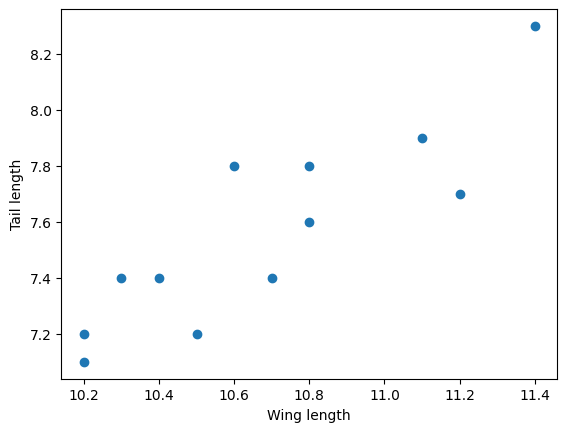

In [8]:
#Written by Seth Talyansky on September 24, 2025
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pingouin
wing_length = np.array([10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4])
tail_length = np.array([7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3])
n = len(wing_length)
wl_mean = np.mean(wing_length)
tl_mean = np.mean(tail_length)

#Exercise 1
print('Exercise 1:')
plt.scatter(wing_length, tail_length)
plt.xlabel('Wing length')
plt.ylabel('Tail length')
print('These measures appear fairly correlated')

In [11]:
#Exercise 2
xy = 0
x = 0
y = 0
for i in range(n):
    xy += (wing_length[i] - wl_mean) * (tail_length[i] - tl_mean)
    x += (wing_length[i] - wl_mean)**2
    y += (tail_length[i] - tl_mean)**2
r_manual = xy/(x**0.5)/(y**0.5)
r_builtin = np.corrcoef(wing_length, tail_length)[1][0]
print('The manually calculated correlation coefficient is %f'%r_manual)
print('This matches the coefficient calculated using the built-in function: %f'%r_builtin)

The manually calculated correlation coefficient is 0.870355
This matches the coefficient calculated using the built-in function: 0.870355


In [25]:
#Exercise 3
sr = ((1-r_manual**2)/(n-2))**0.5
print('The standard error is %f'%sr)
z = 0.5*np.log((1+r_manual)/(1-r_manual))
sz = (1/(n-3))**0.5
l = z - stats.norm.ppf(0.975) * sz
u = z + stats.norm.ppf(0.975) * sz
ci = [float((np.exp(2*l)-1)/(np.exp(2*l)+1)), float((np.exp(2*u)-1)/(np.exp(2*u)+1))]
print('The 95%% confidence interval is %s'%ci)


The standard error is 0.155719
The 95% confidence interval is [0.5923110780844787, 0.9631598602746105]


In [29]:
#Exercise 4
t = r_manual/sr
p = stats.t.pdf(t, n-2)
print('The correlation coefficient is significant at the P < 0.05 level because the P value of %.5f associated with the t-statistic is less than 0.025'%p)

The correlation coefficient is significant at the P < 0.05 level because the P value of 0.00016 associated with the t-statistic is less than 0.025


In [32]:
#Exercise 5
zrs = 0.5*np.log((1+0.75)/(1-0.75))
la = (z - zrs)/((1/(n-3))**0.5)
p = stats.t.pdf(la, n-2)
print('The correlation coefficient is not different from 0.75 at the P < 0.05 level of significance because the P value of %.2f associated with the t-statistic (lambda) is greater than 0.05'%p)

The correlation coefficient is not different from 0.75 at the P < 0.05 level of significance because the P value of 0.21 associated with the t-statistic (lambda) is greater than 0.05


In [7]:
#Exercise 6
min_n = np.ceil(pingouin.power_corr(r=0.5, power=0.8, alpha=0.05))
print('To achieve 80%% power, a sample size of at least %d is needed'%min_n)

To achieve 80% power, a sample size of at least 19 is needed
